In [ ]:
# import libraries
from pulp import *

# create the linear programming model
lp = LpProblem("Toys", LpMaximize)

# define variables
a = LpVariable(name='Item A', lowBound=10, cat='Integer')
b = LpVariable(name='Item B', lowBound=15, cat='Integer')
c = LpVariable(name='Item C', lowBound=20, cat='Integer')

In [ ]:
# specify objective function
lp.objective = (225 * a) + (200*b) + (250*c)
lp

In [ ]:
# setting up constraints
lp.addConstraint(175*a + 125*b + 200*c <= 10000, 'budget')
lp.addConstraint(a+b+c <= 2000, 'inventory')
lp.constraints

In [ ]:
# solve the linear programming problem
# 1 = Optimal, 2 = Infeasible, 3 = Unbounded, 4 = Undefined, 5 = Not Solved

status = lp.solve(PULP_CBC_CMD(msg=0))
print(status)

# print solution
for var in lp.variables():
    print(var,'=',value(var))
    
print('OPT',value(lp.objective))

In [9]:
# import libraries
from pulp import *

# create the linear programming model
lp = LpProblem("Electricity", LpMaximize)

# define variables
a = LpVariable(name='1 home', lowBound=0, cat='Integer')
b = LpVariable(name='2 home', lowBound=0, cat='Integer')
c = LpVariable(name='3 home', lowBound=0, cat='Integer')
d = LpVariable(name='1 garage', lowBound=0, cat='Integer')
e = LpVariable(name='2 garage', lowBound=0, cat='Integer')
f = LpVariable(name='3 garage', lowBound=0, cat='Integer')
g = LpVariable(name='1 penthouse', lowBound=0, cat='Integer')
h = LpVariable(name='2 penthouse', lowBound=0, cat='Integer')
i = LpVariable(name='3 penthouse', lowBound=0, cat='Integer')

In [10]:
# specify objective function
lp.objective = (2*a) + (3*b) + (4*c) + (2*d) + (3*e) + (4*f) + (2*g) + (3*h) + (4*i)
lp

Electricity:
MAXIMIZE
2*1_garage + 2*1_home + 2*1_penthouse + 3*2_garage + 3*2_home + 3*2_penthouse + 4*3_garage + 4*3_home + 4*3_penthouse + 0
VARIABLES
0 <= 1_garage Integer
0 <= 1_home Integer
0 <= 1_penthouse Integer
0 <= 2_garage Integer
0 <= 2_home Integer
0 <= 2_penthouse Integer
0 <= 3_garage Integer
0 <= 3_home Integer
0 <= 3_penthouse Integer

In [11]:
# setting up constraints
lp.addConstraint(200*a + 260*b + 350*c + 200*d + 260*e + 350*f + 200*g + 260*h + 350*i  <= 16000, 'budget')
lp.addConstraint(2*a + 4*b + 5*c <= 100, 'home_area')
lp.addConstraint(2*d + 4*e + 5*f <= 20, 'garage_area')
lp.addConstraint(2*g + 4*h + 5*i <= 80, 'penthouse_area')
lp.constraints

OrderedDict([('budget',
              200*1_garage + 200*1_home + 200*1_penthouse + 260*2_garage + 260*2_home + 260*2_penthouse + 350*3_garage + 350*3_home + 350*3_penthouse + -16000 <= 0),
             ('home_area', 2*1_home + 4*2_home + 5*3_home + -100 <= 0),
             ('garage_area', 2*1_garage + 4*2_garage + 5*3_garage + -20 <= 0),
             ('penthouse_area',
              2*1_penthouse + 4*2_penthouse + 5*3_penthouse + -80 <= 0)])

In [12]:
# solve the linear programming problem
# 1 = Optimal, 2 = Infeasible, 3 = Unbounded, 4 = Undefined, 5 = Not Solved

status = lp.solve(PULP_CBC_CMD(msg=0))
print(status)

# print solution
for var in lp.variables():
    print(var,'=',value(var))
    
print('OPT',value(lp.objective))

1
1_garage = 3.0
1_home = 25.0
1_penthouse = 5.0
2_garage = 1.0
2_home = 0.0
2_penthouse = 0.0
3_garage = 2.0
3_home = 10.0
3_penthouse = 14.0
OPT 173.0


In [22]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os

pwd = os.getcwd()

df = pd.read_csv(pwd + r'\airfoil_self_noise.csv')
df.head()

,obs,frequency,angle,length,velocity,thickness,soundPressure
0,1,800,0.0,0.3048,71.3,0.002663,126.201
1,2,1000,0.0,0.3048,71.3,0.002663,125.201
2,3,1250,0.0,0.3048,71.3,0.002663,125.951
3,4,1600,0.0,0.3048,71.3,0.002663,127.591
4,5,2000,0.0,0.3048,71.3,0.002663,127.461


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   obs            1503 non-null   int64  
 1   frequency      1503 non-null   int64  
 2   angle          1503 non-null   float64
 3   length         1503 non-null   float64
 4   velocity       1503 non-null   float64
 5   thickness      1503 non-null   float64
 6   soundPressure  1503 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 82.3 KB


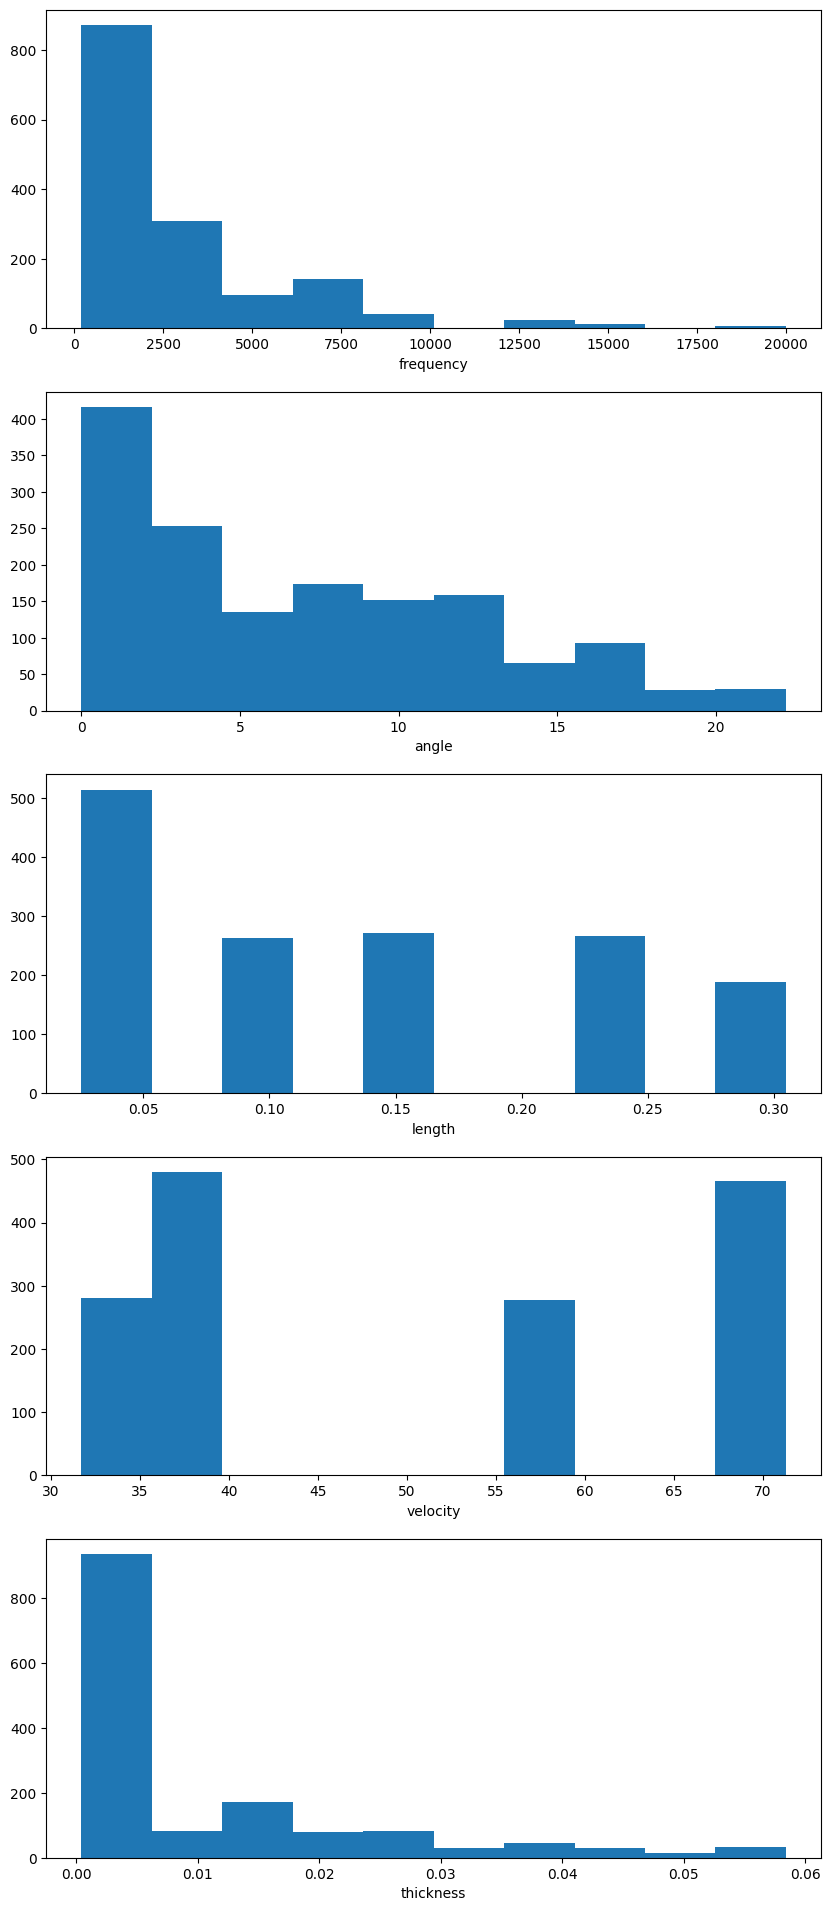

In [24]:
# define list of predictors
features  = ['frequency', 'angle', 'length', 'velocity', 'thickness']

fig, ax = plt.subplots(5, 1, figsize=(10, 24))

i = 0

for variable in features:
    ax[i].hist(df[variable])
    ax[i].set_xlabel(variable)
    
    i +=1

IndexError: index 6 is out of bounds for axis 0 with size 6

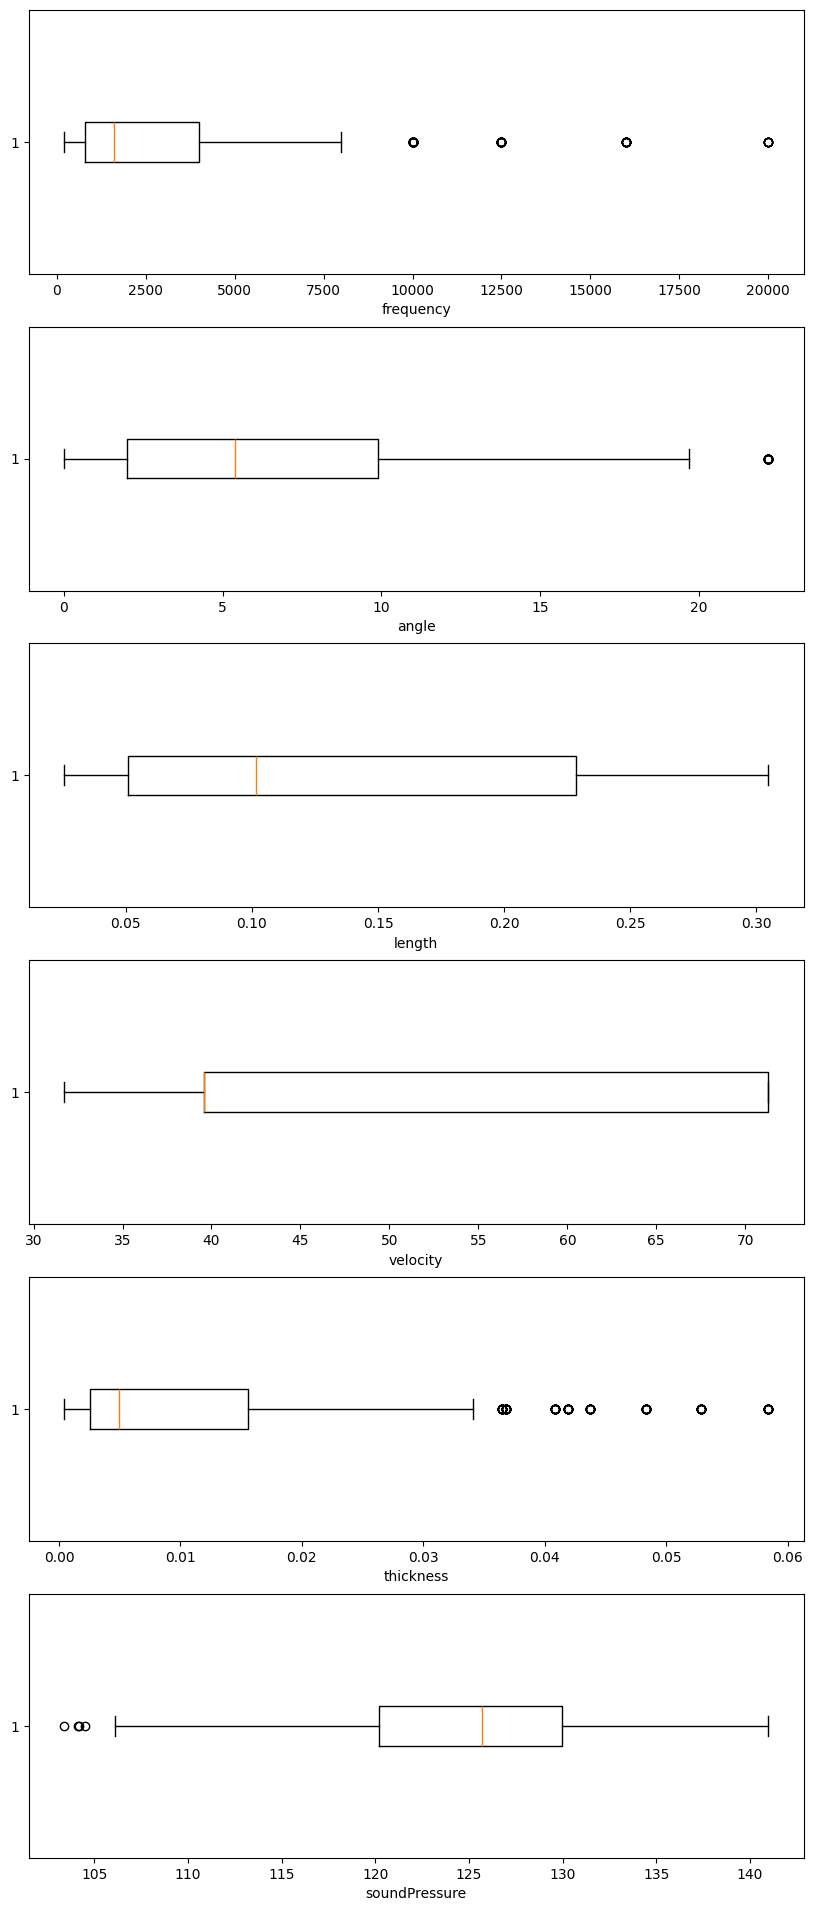

In [26]:
features.append('soundPressure')

# create the sub plot
fig, ax = plt.subplots(6, 1, figsize=(10, 24))

i = 0

for variable in features:
    ax[i].boxplot(df[variable], vert=False)
    ax[i].set_xlabel(variable)
    
    i +=1